In [32]:
#@Imports
import sys
import os
path = os.path.abspath('../..')
if path not in sys.path:
  sys.path.insert(0, path)

%load_ext autoreload

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.special import softmax
import csv

# df = pd.read_csv("./sensation_no_metaphor.csv")
df = pd.read_csv("./sensation_param_sweep.csv")

positive = []
negative = []

for v in np.array(df['positive']):
  v1 = np.array([v.replace('[', '').replace(']', '').split(" ")])
  v2 = v1.astype(float)
  positive.append(v2.squeeze())

for v in np.array(df['negative']):
  v1 = np.array([v.replace('[', '').replace(']', '').split(" ")])
  v2 = v1.astype(float)
  negative.append(v2.squeeze())

positive = np.array(positive)
negative = np.array(negative)
gvs = np.array(df['gv'])
bvs = np.array(df['bv'])
pw = np.array(df['pw'])

scale = [1.4, 6, 17, 34.7, 52.5, 100]

In [2]:
# matmul across scale values 
affect = (positive @ np.array(scale)) - (negative @ np.array(scale))

In [3]:
evs = (gvs * (pw/100)) + (bvs * (1 - (pw/100)))
evs

array([  0.,   0.,   0., ...,  60.,  80., 100.])

Text(0, 0.5, 'Affective Value')

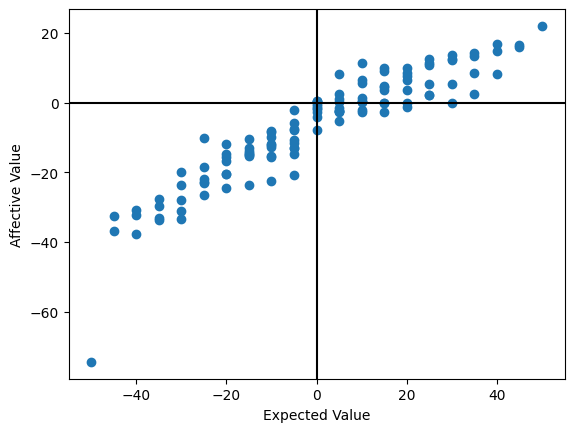

In [15]:
plt.scatter(evs[pw == 50], affect[pw == 50])
plt.axhline(y = 0, color='k')
plt.axvline(x = 0, color='k')
plt.xlabel("Expected Value")
plt.ylabel("Affective Value")

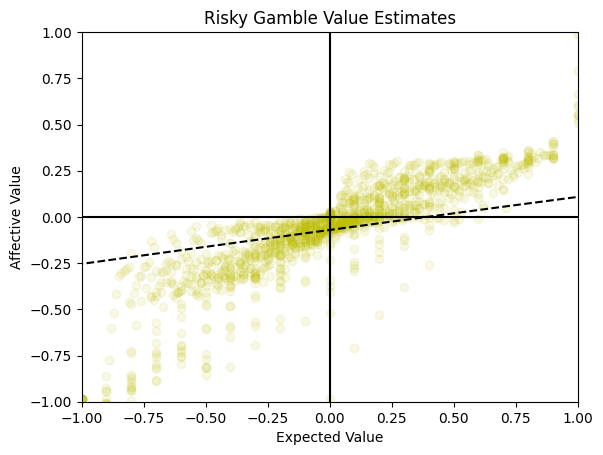

In [27]:
"""Implement basic prospect theory curves based on partial sigmoid curves."""

import numpy as np
import matplotlib.pyplot as plt

def curve_fit(expected_values: list[float], attitudes: list[float]) -> tuple[np.ndarray, np.ndarray]:
  """Fit data with expected values and attitudes towards risky gambles, and return a dictionary of"""
  gains = np.array([expected_value for expected_value, attitude in zip(expected_values, attitudes) if np.greater_equal(expected_value, 0)])
  g_attitude = np.array([attitude for expected_value, attitude in zip(expected_values, attitudes) if np.greater_equal(expected_value, 0)])
  losses = np.array([expected_value for expected_value, attitude in zip(expected_values, attitudes) if np.less(expected_value, 0)])
  l_attitude = np.array([attitude for expected_value, attitude in zip(expected_values, attitudes) if np.less(expected_value, 0)])

  from scipy.optimize import curve_fit

  def sigmoid(x, L ,x0, k, b):
      y = L / (1 + np.exp(-k*(x-x0))) + b
      return (y)

  # Fit for gains
  p0 = [max(g_attitude), np.median(gains),1,min(g_attitude)] # this is an mandatory initial guess
  popt, _ = curve_fit(sigmoid, gains, g_attitude,p0, method='dogbox', maxfev=100000)

  # Fit for losses
  q0 = [max(l_attitude), np.median(losses),1,min(l_attitude)] # this is an mandatory initial guess
  qopt, _ = curve_fit(sigmoid, losses, l_attitude,q0, method='dogbox', maxfev=100000)

  l_x = np.linspace(-1,0,100)
  g_x = np.linspace(0,1,100)

  all_x = np.linspace(-10, 10, 1000)
  r0 = [max(attitudes), np.median(expected_values), 1, min(attitudes)]
  ropt, _ = curve_fit(sigmoid, expected_values, attitudes, r0, method='dogbox', maxfev=100000)

  x = np.concatenate(
     (l_x, g_x)
  )
  curve = np.concatenate(
     (sigmoid(l_x, *qopt),
     sigmoid(g_x, *popt))
  )


  return all_x, sigmoid(all_x, *ropt)

def plot_curve(
    x: np.ndarray,
    curve: np.ndarray,
    expected_values: list[float],
    attitudes: list[float],
    title: str = "Risky Gamble Value Estimates"
) -> None:
  """Plot a prospect theory curve."""
  plt.plot(expected_values, attitudes, 'yo', alpha = 0.1)
  plt.plot(x, curve, '--k')
  plt.axhline(y = 0, color='k')
  plt.axvline(x = 0, color='k')
  plt.xlabel("Expected Value")
  plt.ylabel("Affective Value")
  plt.ylim(-1., 1.)
  plt.xlim(-1., 1.)
  plt.title(title)
  plt.show()

x, curve = curve_fit(evs/100, affect/100)
plot_curve(x, curve, evs/100, affect/100)

In [56]:
print(sorted(affect/100, reverse = True))
print(sorted(evs/100, reverse = True))

[0.18796531375278577, 0.18492149425411317, 0.1831994461999148, 0.1665689938761108, 0.16093739845803973, 0.15881307042639675, 0.15590597492261465, 0.1501507676950198, 0.1489156643735796, 0.14477122435798492, 0.13355050389010809, 0.10653781832336065, 0.0975914520847457, 0.06381874397156687, 0.06237651297447527, 0.061226128516771505, 0.047962873710258015, 0.046371487118512494, 0.031833261502847564, 0.030917542154832063, 0.0218067129020028, 0.010154164445975767, 0.0018132815625781973, 0.00046183122041114187, -0.0006172416007284554, -0.01185145138538065, -0.018139756908593867, -0.024308044104157104, -0.03502159765188985, -0.03533464400406771, -0.04593695806472173, -0.04744936204161327, -0.056317480753785246, -0.06379954796694758, -0.076582786726105, -0.08254600789287267, -0.09303851947059365, -0.1117684263255564, -0.1149626764243385, -0.11817235625394595, -0.11860850420821684, -0.13588778831850998, -0.14251812447748918, -0.1493326102912219, -0.17244496078310342, -0.17812129610033614, -0.185